In [4]:
# load pickle file
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the pickle file
with open('./simulation_results/results_panwa_week.pkl', 'rb') as f:
    data = pickle.load(f)  

In [12]:
for key, value in data[100].items():
    print(key, value)

Temp Heater 57.89473684210527
Pressure Flash 0.1
HeaterInputs {'FlashTypeOption': 'TP', 'Temperature': 57.894736842, 'TemperatureChange': None, 'DegreesSuperheating': None, 'DegreesSubcooling': None, 'Pressure': 10.0, 'Duty': None, 'Vaporfraction': None, 'PressureDropCorrelation': None, 'Phase': None, 'Phasenumber': '2', 'TemperatureEstimation': None, 'PressureEstimation': None, 'MaximumIteration': 30, 'ErrorTolerance': 0.0001}
VaporOutputs {'Source': 'B1', 'Destination': None, 'Phase': 'VAPOR', 'PropertySet': 'PENG-ROB', 'VolumeFlow': 50271.081, 'CompoundNameList': ['BENZENE', 'TOLUENE'], 'MoleFlowList': [9.0227966, 3.03508531], 'MassFlowList': [704.803485, 279.654339], 'MoleFracList': [0.748290344, 0.251709656], 'MassFracList': [0.715930605, 0.284069395], 'LiquidConcentrationList': [0.465956521, 0.534043479], 'VaporConcentrationList': [0.748290344, 0.251709656], 'VaporFraction': 1, 'LiquidFraction': 1, 'SolidFraction': 1}
LiquidOutputs {'Source': 'B1', 'Destination': None, 'Phase': '

In [17]:
# Extract data from all entries in the list
flash_pressures = []
heater_temperatures = []
benzene_purity_vapor = []
toluene_purity_vapor = []
benzene_purity_liquid = []
toluene_purity_liquid = []

# Loop through all 400 data points
for entry in data:
    flash_pressures.append(entry['Pressure Flash'])
    heater_temperatures.append(entry['HeaterInputs']['Temperature'])
    
    # Extract mole fractions in vapor and liquid phase
    vapor_mole_frac = entry['VaporOutputs']['MoleFracList']
    liquid_mole_frac = entry['LiquidOutputs']['MoleFracList']

    benzene_purity_vapor.append(vapor_mole_frac[0])
    toluene_purity_vapor.append(vapor_mole_frac[1])
    benzene_purity_liquid.append(liquid_mole_frac[0])
    toluene_purity_liquid.append(liquid_mole_frac[1])

# Create DataFrame
purity_trends = pd.DataFrame({
    'Flash Pressure (bar)': flash_pressures,
    'Heater Temperature (°C)': heater_temperatures,
    'Benzene Purity (Vapor)': benzene_purity_vapor,
    'Toluene Purity (Vapor)': toluene_purity_vapor,
    'Benzene Purity (Liquid)': benzene_purity_liquid,
    'Toluene Purity (Liquid)': toluene_purity_liquid
})

na_counts = purity_trends.isna().sum()
print(na_counts)

Flash Pressure (bar)       0
Heater Temperature (°C)    0
Benzene Purity (Vapor)     0
Toluene Purity (Vapor)     0
Benzene Purity (Liquid)    0
Toluene Purity (Liquid)    0
dtype: int64


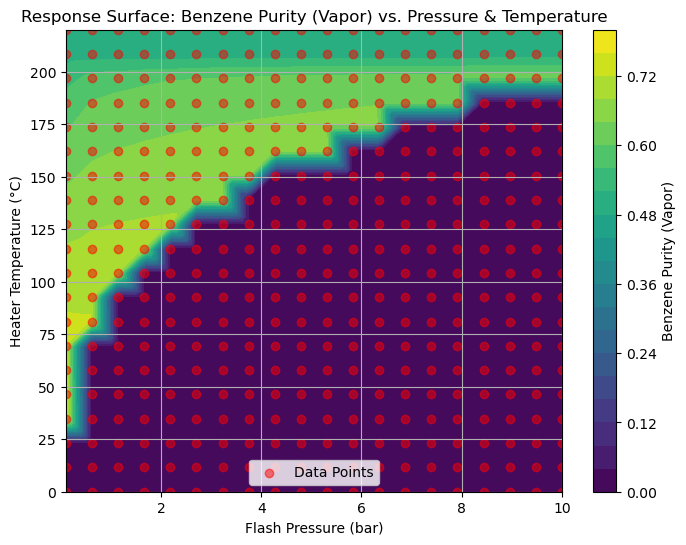

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Remove any NaN values from the dataset before interpolation
purity_trends_clean = purity_trends.dropna()

# Extract relevant columns
X = purity_trends_clean['Flash Pressure (bar)']
Y = purity_trends_clean['Heater Temperature (°C)']
Z = purity_trends_clean['Benzene Purity (Vapor)']  # Using Benzene Purity in Vapor as the target

# Create a grid for contour plotting
xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate data for smooth surface plot
zi = griddata((X, Y), Z, (xi, yi), method='linear')

# Plot the 2D response surface
plt.figure(figsize=(8, 6))
contour = plt.contourf(xi, yi, zi, levels=20, cmap="viridis")
plt.colorbar(contour, label="Benzene Purity (Vapor)")
plt.scatter(X, Y, color='red', marker='o', alpha=0.5, label="Data Points")
plt.xlabel("Flash Pressure (bar)")
plt.ylabel("Heater Temperature (°C)")
plt.title("Response Surface: Benzene Purity (Vapor) vs. Pressure & Temperature")
plt.legend()
plt.grid(True)
plt.show()
